#**LAB 9**

## **Question 1:** K-Means clustering [30]
You have been given the [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine) and the details about the dataset is given in the link. Do the pre-processing of the data before performing the following tasks-

In [19]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.utils import shuffle
import torch
import torch.nn as nn
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")

cols = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab 9/wine.data',names=cols)

Y = df['class']
X = df.drop(['class'],axis=1)

X_train, Y_train, X_test, Y_test = tts(X, Y, test_size=0.3, stratify=Y)

df

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]


a) Use any dimension reduction technique of your choice, visualize the data and by looking at the plot tell

which value of k will be best suited for k-means clustering and why? (no need to use any method to find
optimal k). [7]

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)

k_mean_model = KMeans(n_clusters=3)
k_mean_model.fit(X_train_pca)

KMeans(n_clusters=3)

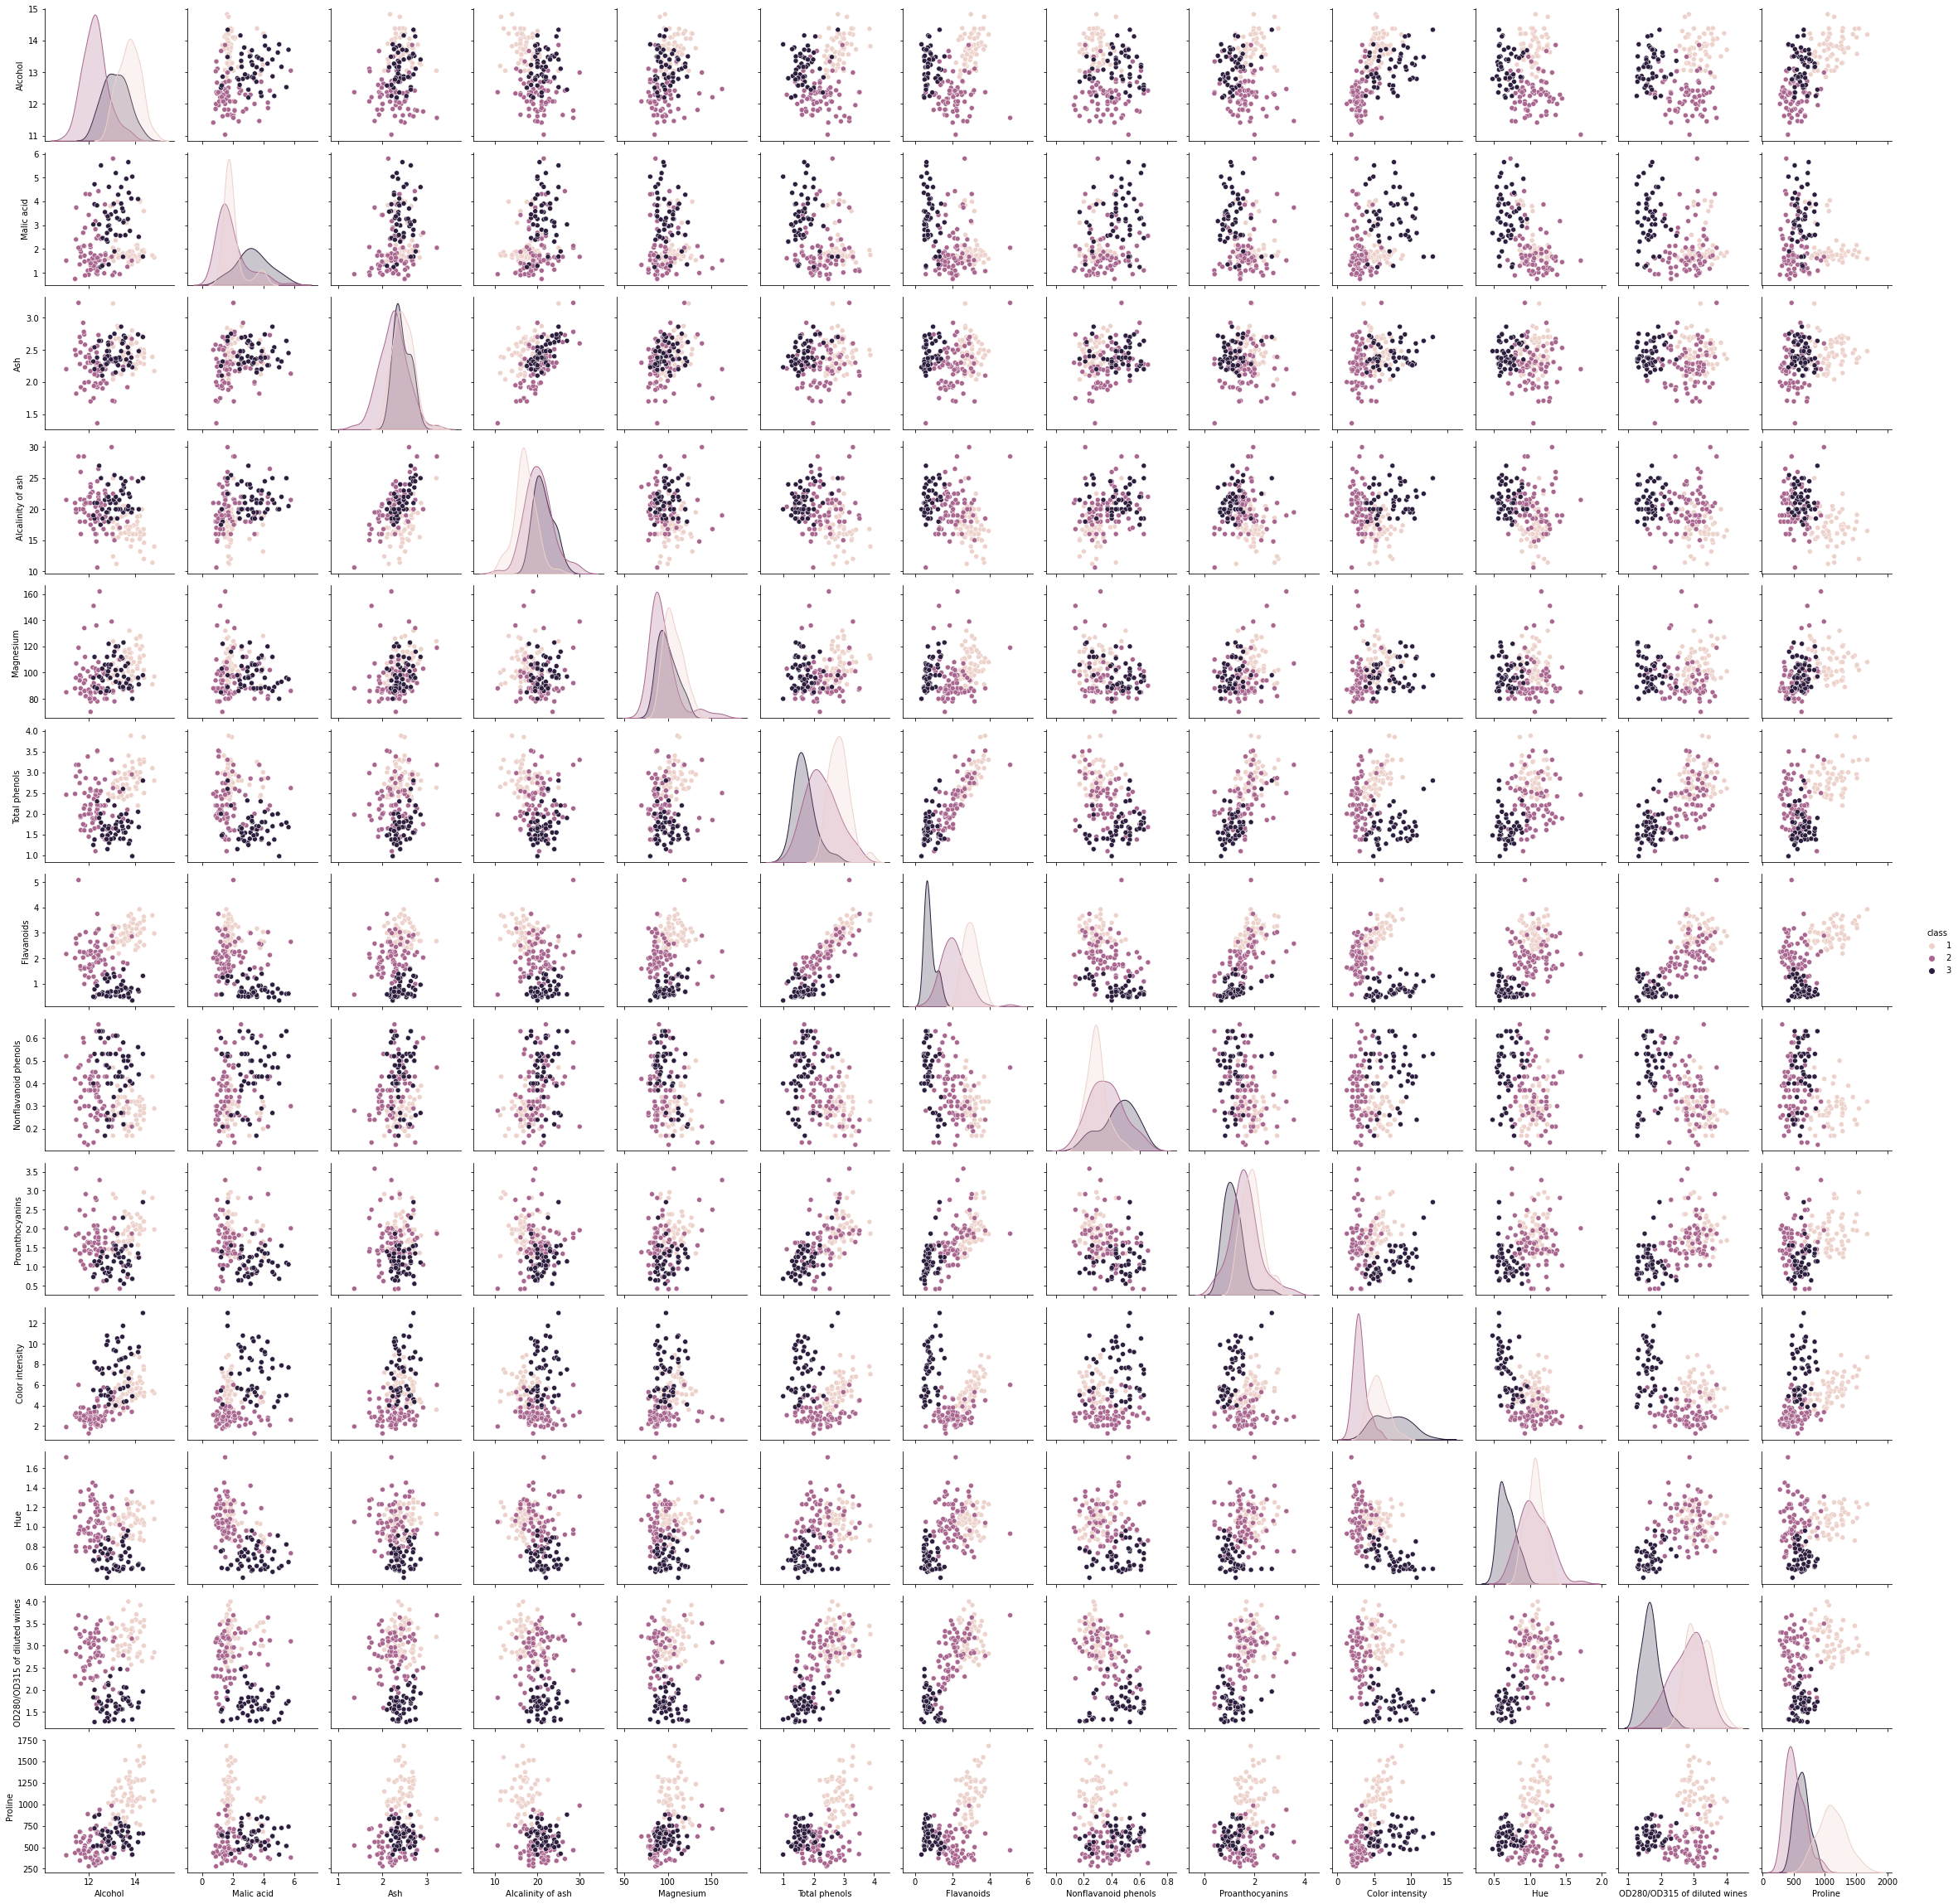

In [4]:
sns.pairplot(df, hue='class')


b) Build a k-means clustering algorithm( can use sklearn library) and implement using the value of k what
you have chosen above. Visualize part b by showing the clusters along with the centroids. [10]

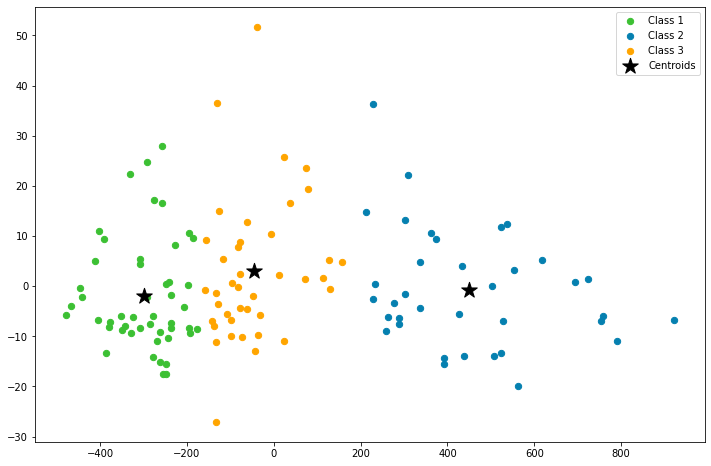

In [ ]:
k = 3
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_pca)
colors=['#3cc033','#0580b0','orange','red','magenta','indigo']

plt.figure(figsize=(12,8))
for i in range(k):
    plt.scatter(X_train_pca[y_kmeans == i, 0], X_train_pca[y_kmeans == i, 1], s = 40, c = colors[i], label = f'Class {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 270, c = 'black', label = 'Centroids',marker='*')
plt.legend()
plt.show()


c) Use different values of k and find the Silhouette Score and then tell which value of k will be optimal and
why? [8]

In [25]:
silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train_pca)
    silhouette.append((i,sklearn.metrics.silhouette_score(X_train_pca,kmeans.labels_)))

print('Silhouette Scores : \n')
print('k : score')
for i in silhouette:
    print(f'{i[0]} : {i[1]}')

Silhouette Scores : 

k : score
2 : 0.6378311468906321
3 : 0.5614388406178343
4 : 0.5563760940042072
5 : 0.5505382329108157
6 : 0.5731829353584807
7 : 0.5607300869849374
8 : 0.5549245254477813
9 : 0.5280713417289145
10 : 0.5241878083008076



d) There are few methods to find the optimal k value for k-means algorithm like the Elbow Method . Use
the above method to find the optimal value of k. [5]

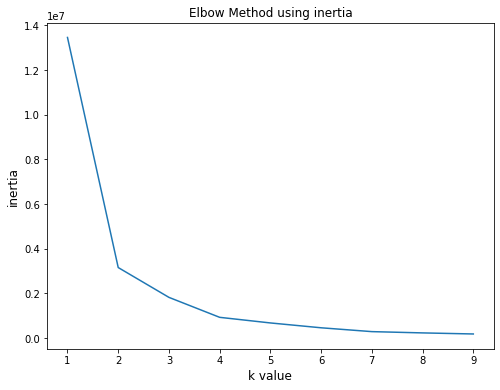

In [ ]:
dist_points_from_cluster_center = []
K = range(1, 10)
for no_of_clusters in K:
    k_model = KMeans(n_clusters=no_of_clusters)
    k_model.fit(X_train_pca)
    dist_points_from_cluster_center.append(k_model.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, dist_points_from_cluster_center)
plt.title('Elbow Method using inertia',fontsize=12)
plt.xlabel('k value',fontsize=12)
plt.ylabel('inertia',fontsize=12)
plt.show()

## **Question 2:** 
We will use the [fashion-MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset for this question (you can download it from any other
source also including libraries).\
Flatten and preprocess the data (if required) before starting the tasks. It will
become a 784 dimensional data with 10 classes, more details are available in the link. Inbuilt functions of
sklearn can not be used for this question (except for functions for auxiliary tasks) [45]\


In [32]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.decomposition import PCA
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab 9/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab 9/fashion-mnist_test.csv')

Y_train = df_train['label']
X_train = df_train.drop(['label'],axis=1)

Y_test = df_test['label']
X_test = df_test.drop(['label'],axis=1)

# X_train, Y_train, X_test, Y_test = tts(X, Y, test_size=0.3, stratify=Y)

a) Implement a k-means clustering algorithm from scratch. [8]


b) Make sure that it should:\
i) Be a class which will be able to store the cluster centers. [2]\
ii) Take a value of k from users to give k clusters. [2]\
iii) Be able to take initial cluster center points from the user as its initialization. [2]\
iv) Stop iterating when it converges (cluster centers are not changing anymore) or, maximum
iteration (given as max_iter by user) is reached. [2]


In [29]:
class K_Means:

    def __init__(self, K=10, max_iter=200):
        self.K = K
        self.max_iters = max_iter
        self.clusters = [[] for i in range(self.K)]
        self.centroids = []

    def predict(self, X, init_mode = 'random', init_cluster_centers = None):
        self.X = np.array(X)
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = None
        if init_mode=='random':
            random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
            self.centroids = [self.X[idx] for idx in random_sample_idxs]
        else:
            self.centroids = init_cluster_centers
        
        # print('centroids',np.array(self.centroids).shape)

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            
            # print('clusters ',self.clusters)

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # print('centroids',self.centroids.shape)
            
            if self._is_converged(centroids_old, self.centroids):
                break

        self.X_PCA = PCA(n_components=2).fit_transform(self.X)
        self.centroids_PCA = self._get_centroids(self.clusters,True)
        return (self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for i in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _closest_centroid(self, sample, centroids):
        distances = [self._euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters, in_pca=False):
        centroids=None
        if in_pca:
            centroids = np.zeros((self.K, 2))
            for cluster_idx, cluster in enumerate(clusters):
                cluster_mean = np.mean(self.X_PCA[cluster], axis=0)
                # print('mean',cluster_mean.shape)
                centroids[cluster_idx] = cluster_mean
        else:
            centroids = np.zeros((self.K, self.n_features))
            for cluster_idx, cluster in enumerate(clusters):
                cluster_mean = np.mean(self.X[cluster], axis=0)
                # print('mean',cluster_mean.shape)
                centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = []
        for i in range(self.K):
            dist = self._euclidean_distance(centroids_old[i], centroids[i])
            distances.append(dist)
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(18, 16))
        for i, index in enumerate(self.clusters):
            # print('i',i)
            # print('indices',index)
            point = self.X_PCA[index].T
            # print('point',point[:2])
            # print(*point[:2])
            ax.scatter(*point[:2],s=7,label=f'cluster {i+1}')

        for i,point in enumerate(self.centroids_PCA):
            ax.scatter(*point[:2], marker="*", color="black", s=200, linewidth=2)
            if i==0:
                ax.scatter(*point[:2], marker="*", color="black", s=50, linewidth=2,label='centroids')
            ax.scatter(*point[:2], marker="*", color="yellow", s=30, linewidth=2)
        plt.legend()
        plt.show()


c) Train the k-means model on f-MNIST data with k = 10 and 10 random 784 dimensional points (in input
range) as initializations. Report the number of points in each cluster. [8]

In [13]:
scratch_model = K_Means(K=10, max_iter=150)
clusters = scratch_model.predict(X_train, init_mode='random') # init_mode = random will generate k=10 random centroid initializations

for i,indices in enumerate(clusters):
    print(f'Cluster {i} : {len(list(indices))} points')

Cluster 0 : 8903 points
Cluster 1 : 3372 points
Cluster 2 : 7232 points
Cluster 3 : 5396 points
Cluster 4 : 6625 points
Cluster 5 : 7813 points
Cluster 6 : 4168 points
Cluster 7 : 6507 points
Cluster 8 : 7345 points
Cluster 9 : 2639 points



d) Visualize the cluster centers of each cluster as 2-d images of all clusters. [4]

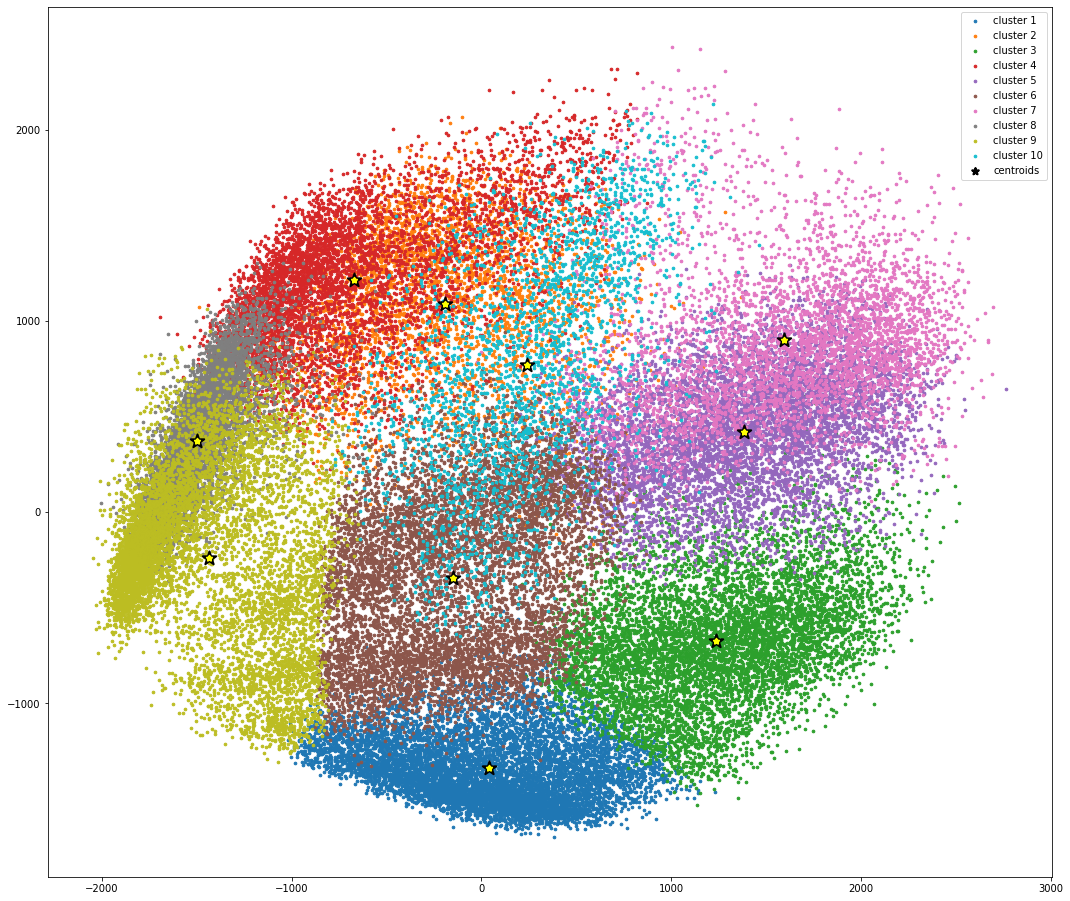

In [14]:
scratch_model.plot()

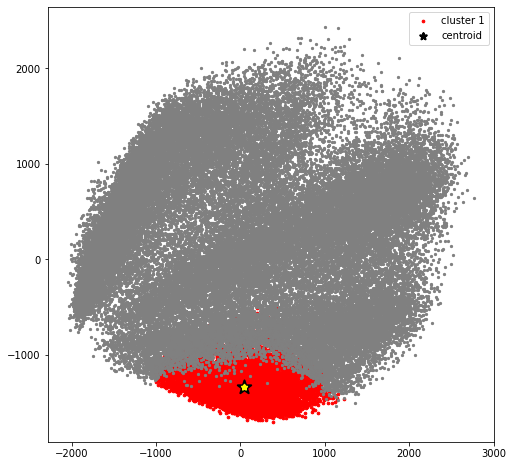

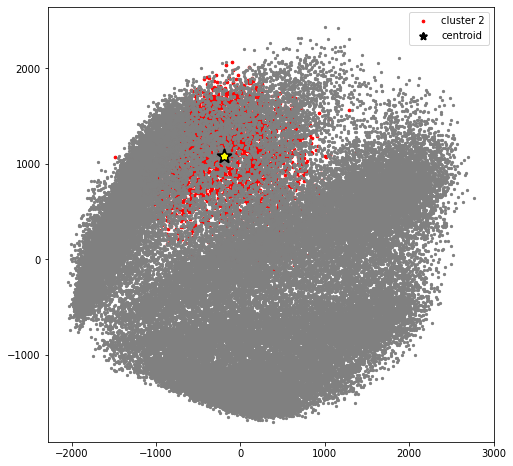

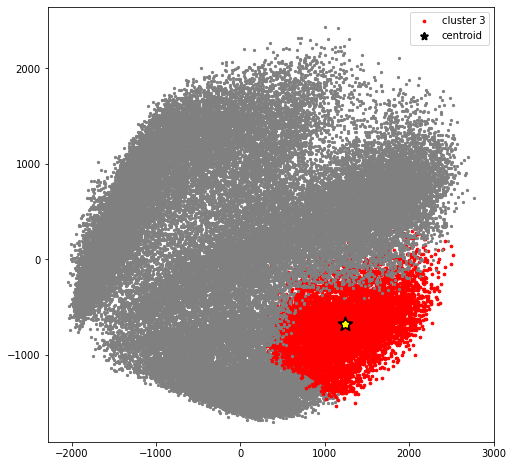

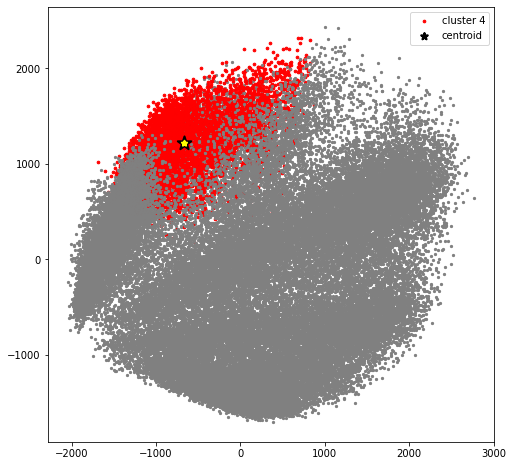

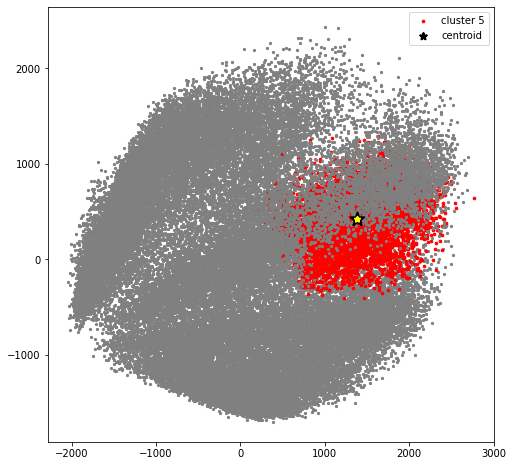

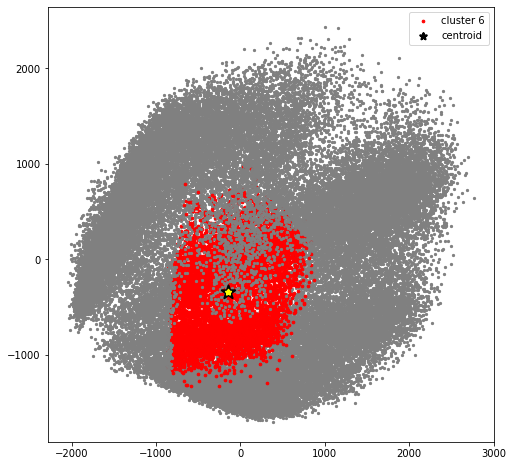

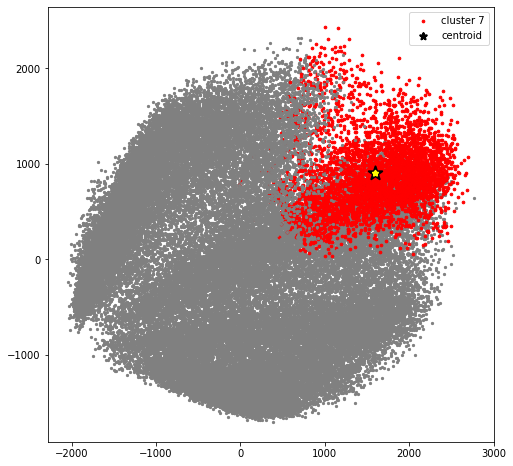

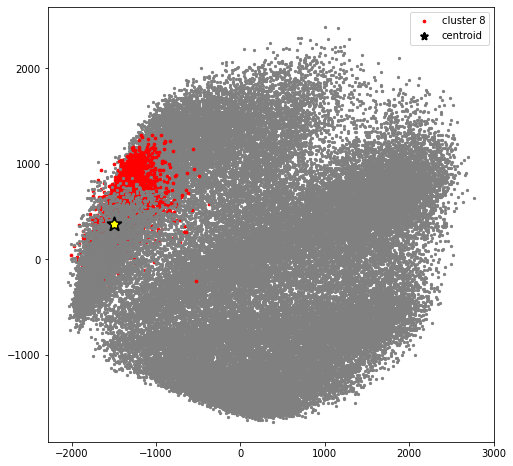

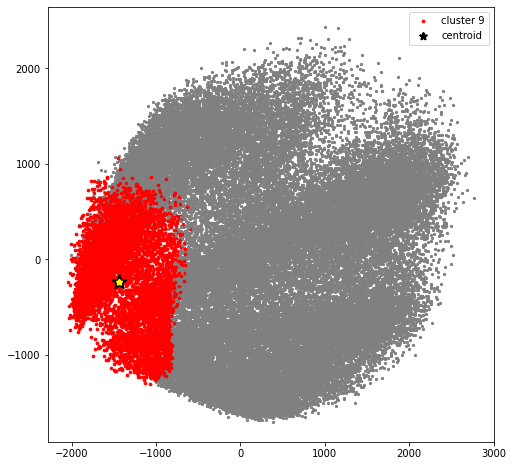

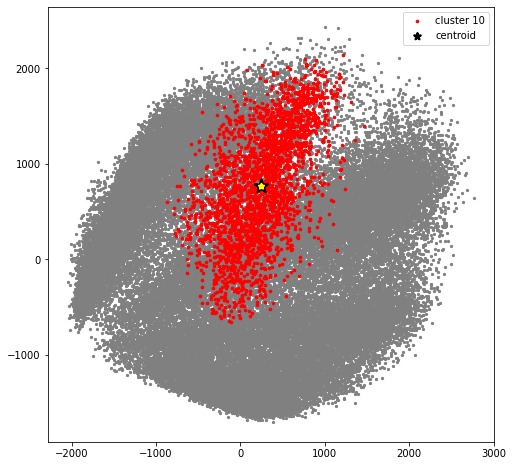

In [15]:
from matplotlib.backend_bases import CloseEvent
for clst in range(10):

    fig, ax = plt.subplots(figsize=(8, 8))
    for i, index in enumerate(scratch_model.clusters):
        point = scratch_model.X_PCA[index].T
        if i==clst:
            ax.scatter(*point[:2],s=7,label=f'cluster {i+1}',c='red')
        else:
            ax.scatter(*point[:2],s=5,c='gray')

    for i,point in enumerate(scratch_model.centroids_PCA):
        if i==clst:
            ax.scatter(*point[:2], marker="*", color="black", s=200, linewidth=2)
            ax.scatter(*point[:2], marker="*", color="black", s=50, linewidth=2,label='centroid')
            ax.scatter(*point[:2], marker="*", color="yellow", s=30, linewidth=2)
    plt.legend()
    plt.show()


e) Visualize 10 images corresponding to each cluster. [3]

1 <= i <= 10
the "i"th row represents 10 "i"th class images :



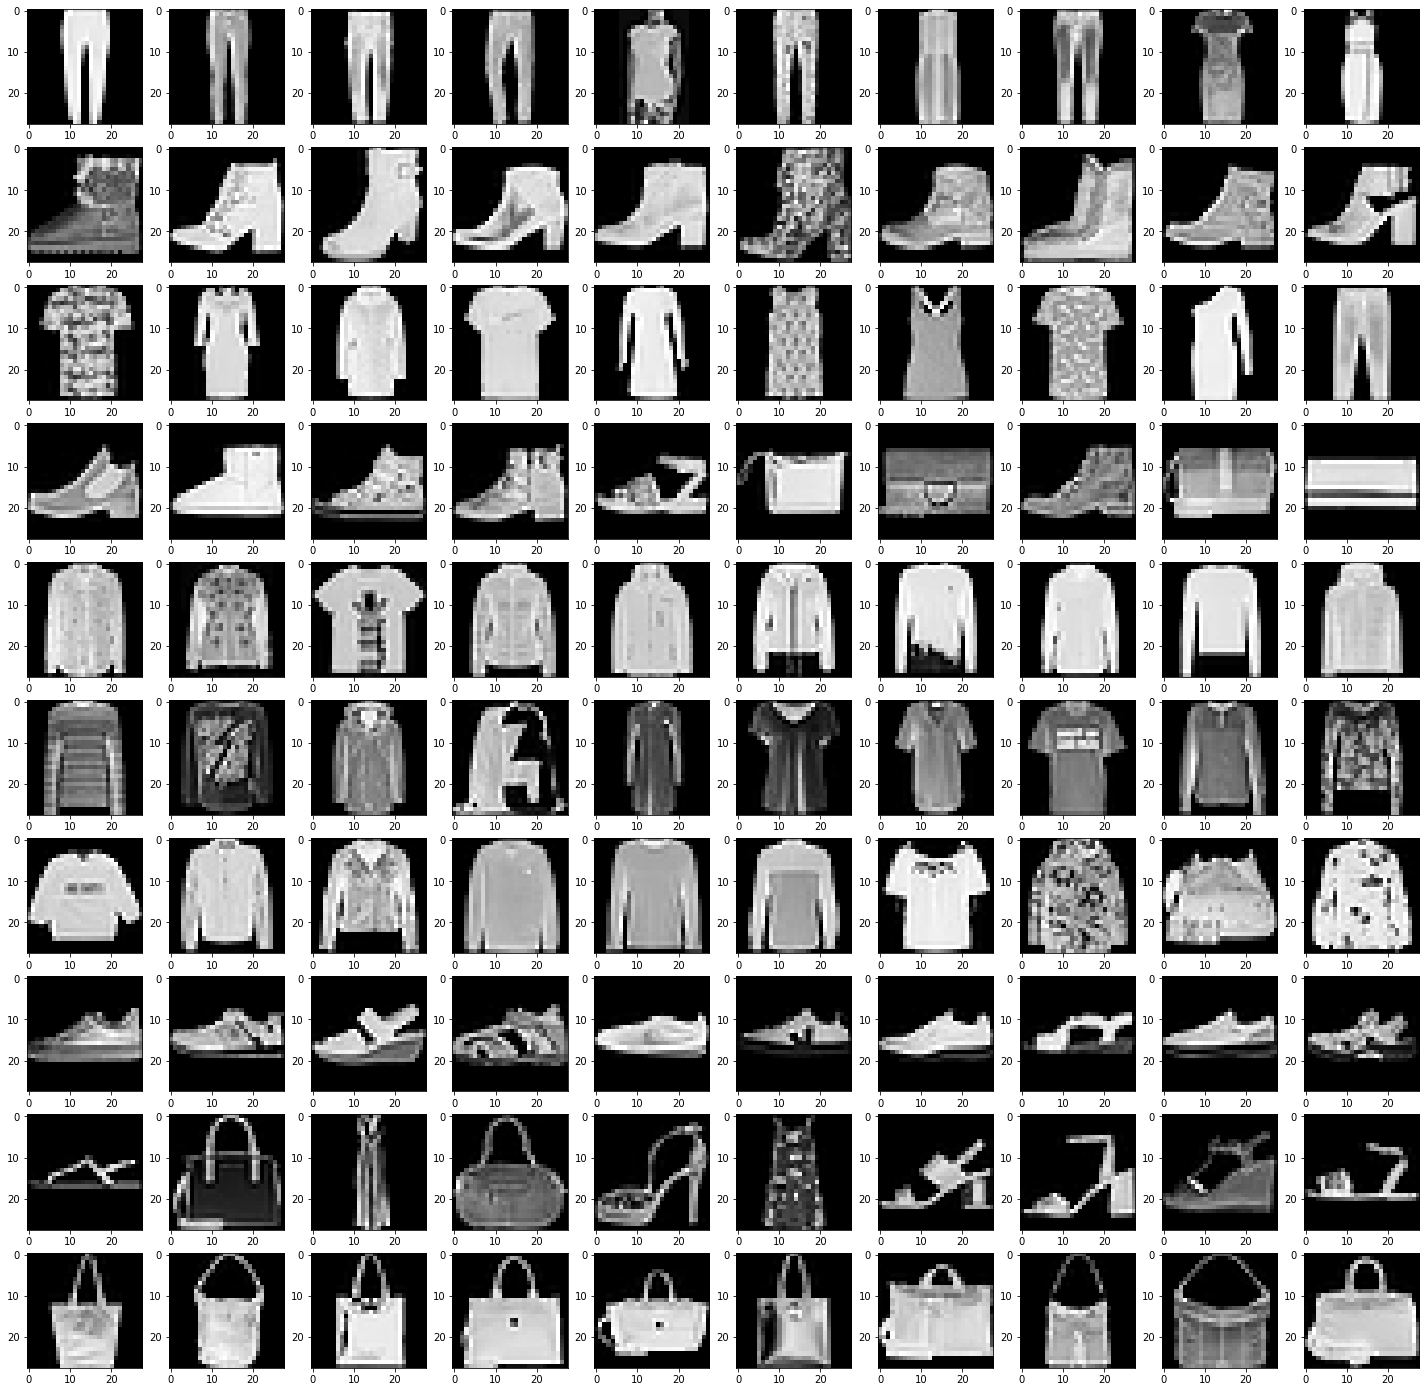

In [46]:
print('1 <= i <= 10\nthe "i"th row represents 10 "i"th class images :\n')

plt.figure(figsize=(25,25))
for i,clst in enumerate(clusters):
    for j in range(10):
        data = scratch_model.X[clst[j],:]
        data = np.reshape(data, (int(np.sqrt(data.shape[0])),int(np.sqrt(data.shape[0]))))
        plt.subplot(10,10,i*10+j+1)
        plt.imshow(data,cmap='gray')
plt.show()


f) Train another k-means model with 10 images from each class as initializations , report the number of
points in each cluster and visualize the cluster centers. [7]

In [33]:
class_indices = [0 for i in range(10)]
for i in np.unique(Y_train):
    Y_train = pd.DataFrame(Y_train)
    class_indices[i] = Y_train[Y_train['label']==i].index[0]

init_centroids = []
for ix in class_indices:
    init_centroids.append(np.array(X_train.loc[ix,:]))

init_centroids = np.array(init_centroids)

In [34]:
model_manual_c = K_Means(K=10, max_iter=150)
clusters_manual = model_manual_c.predict(X_train, init_mode='manual', init_cluster_centers = init_centroids)

for i,indices in enumerate(clusters_manual):
    print(f'Cluster {i} : {len(list(indices))} points')

Cluster 0 : 3795 points
Cluster 1 : 7787 points
Cluster 2 : 2351 points
Cluster 3 : 5174 points
Cluster 4 : 7596 points
Cluster 5 : 7650 points
Cluster 6 : 9710 points
Cluster 7 : 7534 points
Cluster 8 : 2571 points
Cluster 9 : 5832 points



g) Visualize 10 images corresponding to each cluster. [2]

1 <= i <= 10
the "i"th row represents 10 "i"th class images :



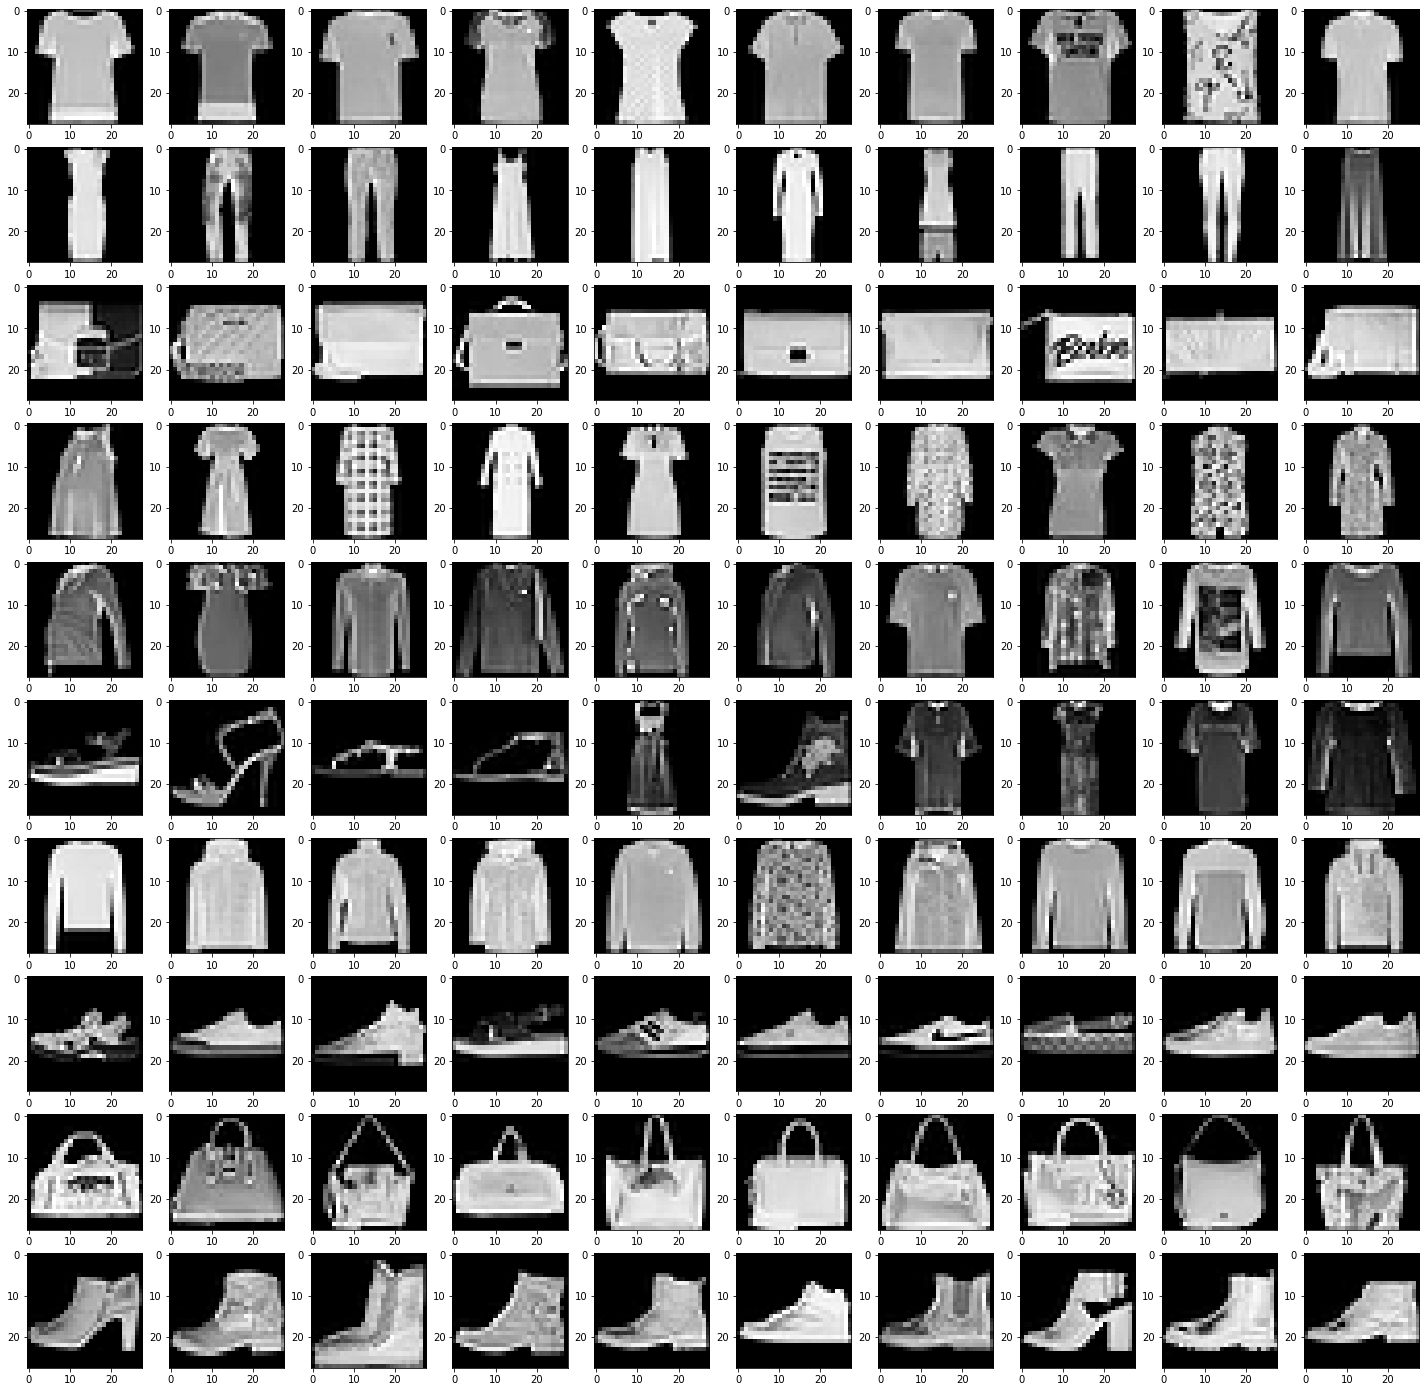

In [48]:
print('1 <= i <= 10\nthe "i"th row represents 10 "i"th class images :\n')
plt.figure(figsize=(25,25))
for i,clst in enumerate(clusters_manual):
    for j in range(10):
        data = model_manual_c.X[clst[10+j],:]
        data = np.reshape(data, (int(np.sqrt(data.shape[0])),int(np.sqrt(data.shape[0]))))
        plt.subplot(10,10,i*10+j+1)
        plt.imshow(data,cmap='gray')
plt.show()


h) Evaluate Clusters of part c and part f with Sum of Squared Error (SSE) method. Report the scores and
comment on which case is a better clustering. [5]

In [52]:
def euclid(x1, x2):
    return 

def calculate_sse(cluster, centroid, X_train):
    X_train = np.array(X_train)
    sse=0
    for i in range(10):
        for j in cluster[i]:
            sse+=np.square(np.sqrt(np.sum((centroid[i] - X_train[j]) ** 2)))
    return sse

sse_model_rnd = calculate_sse(clusters, scratch_model.centroids, X_train)
sse_model_man = calculate_sse(clusters_manual, model_manual_c.centroids, X_train)

print('SSE for each models :\n')
print(f'For Model prepared in part C : {sse_model_rnd}\t[random]')
print(f'For Model prepared in part F : {sse_model_man}\t[manual]')

SSE for each models :

For Model prepared in part C : 124765407589.43472	[random]
For Model prepared in part F : 124543866224.80544	[manual]


In [54]:
print(f'\nWe see that Model in subpart F with manually initialised centroids gives lesser SSE by difference of {sse_model_rnd-sse_model_man:.2f}')
print('So we say that Model of subpart F performs better than the one in part C')


We see that Model in subpart F with manually initialised centroids gives lesser SSE by difference of 221541364.63
So we say that Model of subpart F performs better than the one in part C


## **Question 3:** 
Hierarchical clustering is another unsupervised learning algorithm that is used to group together
the unlabeled data points having similar characteristics.\
Dataset: [Brain Cancer Dataset](https://www.kaggle.com/c/1056lab-brain-cancer-classification/data) : you can check the description about the dataset in the given link. [25]\
A. Check out the dataset & normalize the data so that the scale of each variable will be the same. [5]

In [113]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.decomposition import PCA
from PIL import Image, ImageOps
import warnings
warnings.filterwarnings("ignore")

no_path = '/content/drive/MyDrive/Colab Notebooks/Lab 9/no/'
yes_path = '/content/drive/MyDrive/Colab Notebooks/Lab 9/yes/'
X = []

for img_file in os.listdir(no_path):
    img = Image.open(no_path + img_file)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    X.append(list(img.getdata()))

for img_file in os.listdir(yes_path):
    img = Image.open(yes_path + img_file)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    X.append(list(img.getdata()))

X_original = np.array(X)

In [115]:
X_original.shape

(3000, 16384)

In [116]:
X = preprocessing.MinMaxScaler().fit_transform(X_original)
pd.DataFrame(X)

0         1         2         3         4         5         6      \
0     0.039216  0.039216  0.039216  0.039216  0.039216  0.039216  0.039216   
1     0.109804  0.109804  0.109804  0.109804  0.109804  0.113725  0.113725   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.043137  0.039216  0.035294  0.039216  0.043137  0.043137  0.043137   
4     0.082353  0.082353  0.082353  0.082353  0.082353  0.082353  0.082353   
...        ...       ...       ...       ...       ...       ...       ...   
2995  0.427451  0.541176  0.545098  0.537255  0.513725  0.509804  0.521569   
2996  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
2997  0.007843  0.011765  0.011765  0.011765  0.011765  0.007843  0.000000   
2998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2999  0.011765  0.011765  0.011765  0.000000  0.000000  0.011765  0.011765   

         7         8         9      ...     16374     16375     16376  \
0     0.039216  0.039216  0.039216  ...  0.039216  0.039216  0.039216   
1     0.109804  0.109804  0.109804  ...  0.109804  0.109804  0.109804   
2     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3     0.043137  0.043137  0.039216  ...  0.039216  0.043137  0.039216   
4     0.082353  0.082353  0.082353  ...  0.086275  0.086275  0.082353   
...        ...       ...       ...  ...       ...       ...       ...   
2995  0.525490  0.525490  0.529412  ...  0.070588  0.066667  0.090196   
2996  0.003922  0.003922  0.003922  ...  0.003922  0.003922  0.003922   
2997  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2998  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2999  0.007843  0.003922  0.015686  ...  0.003922  0.003922  0.003922   

         16377     16378     16379     16380     16381     16382     16383  
0     0.039216  0.039216  0.039216  0.039216  0.039216  0.039216  0.039216  
1     0.109804  0.109804  0.109804  0.109804  0.109804  0.109804  0.109804  
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3     0.035294  0.035294  0.031373  0.031373  0.035294  0.039216  0.039216  
4     0.086275  0.094118  0.082353  0.074510  0.098039  0.035294  0.396078  
...        ...       ...       ...       ...       ...       ...       ...  
2995  0.117647  0.109804  0.121569  0.105882  0.105882  0.109804  0.125490  
2996  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  
2997  0.000000  0.000000  0.007843  0.011765  0.019608  0.027451  0.003922  
2998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2999  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  

[3000 rows x 16384 columns]


B. Use any dimension reduction technique and visualize the dataset & find out the number of communities
available. [7]

In [118]:
X = PCA(n_components=784).fit_transform(X)


C. Visualize the communities from part A. [5]

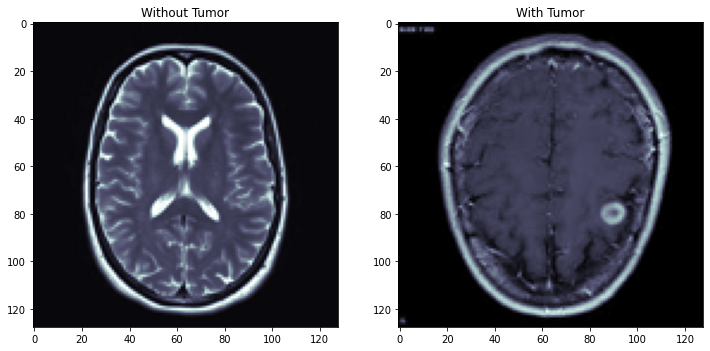

In [130]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Without Tumor')
yes_img = np.reshape(X_original[0], (int(np.sqrt(X_original.shape[1])),int(np.sqrt(X_original.shape[1]))))
plt.imshow(yes_img,cmap='bone')

plt.subplot(1,2,2)
plt.title('With Tumor')
no_img = np.reshape(X_original[-1], (int(np.sqrt(X_original.shape[1])),int(np.sqrt(X_original.shape[1]))))
plt.imshow(no_img,cmap='bone')
plt.show()


D. Apply Agglomerative hierarchical clustering (using sklearn). [5]

In [119]:
from sklearn.cluster import AgglomerativeClustering as AC
agglo_preds = AC(2).fit_predict(X)


E. Apply K-means (sklearn) and make a comparison between these two approaches & justify your results.
[8]

In [120]:
from sklearn.cluster import KMeans
kmeans_preds = KMeans(2).fit_predict(X)

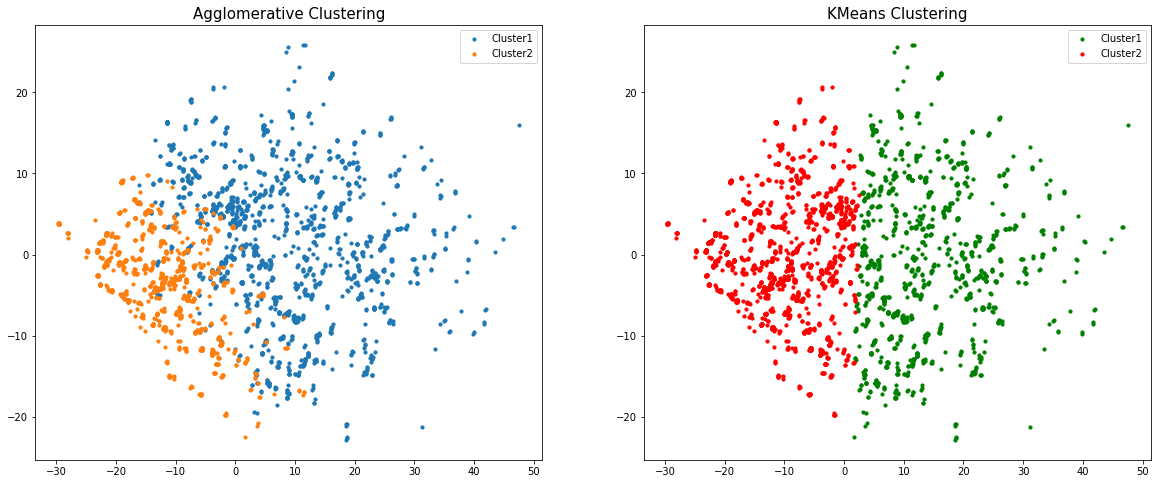

In [121]:
X_pca = PCA(n_components = 2).fit_transform(X)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Agglomerative Clustering', fontsize=15)
plt.scatter(X_pca[agglo_preds==0][:,0],X_pca[agglo_preds==0][:,1], s=10)
plt.scatter(X_pca[agglo_preds==1][:,0],X_pca[agglo_preds==1][:,1], s=10)
plt.legend(['Cluster1','Cluster2'])

plt.subplot(1,2,2)
plt.title('KMeans Clustering', fontsize=15)
plt.scatter(X_pca[kmeans_preds==0][:,0],X_pca[kmeans_preds==0][:,1], s=10, c='green')
plt.scatter(X_pca[kmeans_preds==1][:,0],X_pca[kmeans_preds==1][:,1], s=10, c='red')
plt.legend(['Cluster1','Cluster2'])
plt.show()

In [138]:
Y = [1 for i in range(1500)]+[0 for i in range(1500)]

print('Accuracies :\n')
print(f'Agglomerative Clustering : {metrics.accuracy_score(Y,agglo_preds):.4f}')
print(f'KMeans Clustering : {metrics.accuracy_score(Y,kmeans_preds):.4f}')

Accuracies :

Agglomerative Clustering : 0.7323
KMeans Clustering : 0.6643
